In [1]:
import torch 
precision = 'fp32'
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision)

Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


In [4]:
#!conda install numpy scipy scikit-image matplotlib

In [2]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


In [3]:
ssd_model.to('cuda')
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [4]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
    'https://s3.amazonaws.com/pbblogassets/uploads/2015/07/Point-of-View-Featured-image-3-copy.jpg',
    'http://images.cocodataset.org/val2017/000000252219.jpg',
    'https://www.meandi.com/-/media/2020/ss20/two-column-image/blisaljare-site.ashx?h=1080&la=sv-SE&w=1080&hash=ADF170557E45A8E3481D19F6F48FAE087167B7D3',
    'https://www.femman.com/link/7fc6f813a46047bbb891ae7a6a8f1c79.aspx',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRamYvTLh3y3U4TkUz9TQoKjQ2s8b2b9BUYAl8170vuhxc5g4pR',
]

In [5]:
import skimage.io,  skimage.transform
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs, precision == 'fp16')

In [6]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

In [7]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.50) for results in results_per_input]


In [8]:
classes_to_labels = utils.get_coco_object_dictionary()

44 237 197 277
33 300 39 292
115 259 152 203
25 301 111 290
37 293 -1 134
0 276 169 301
10 294 -1 130
18 291 27 278
50 271 47 185


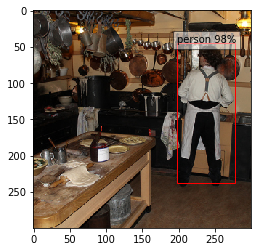

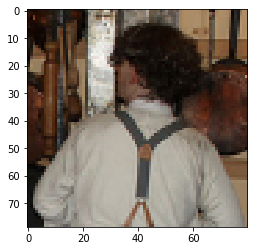

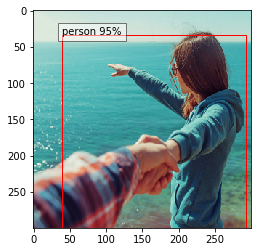

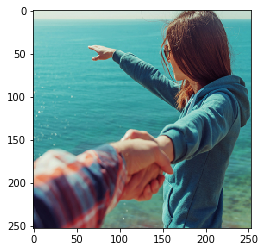

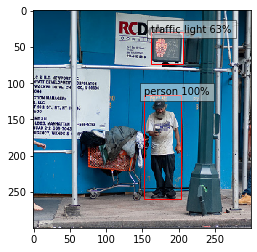

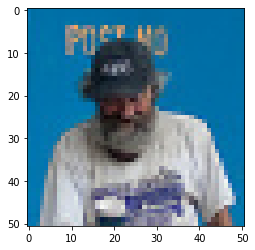

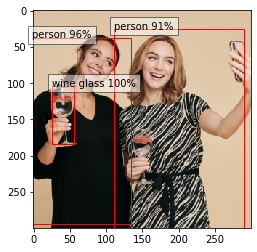

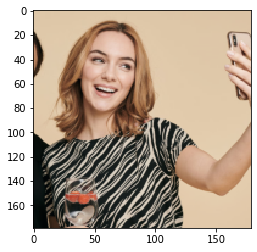

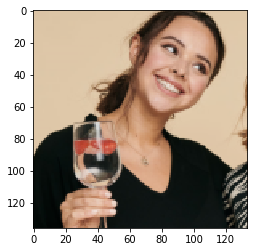

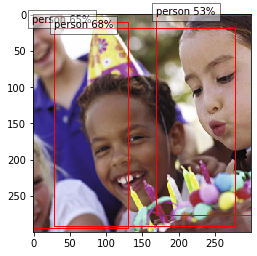

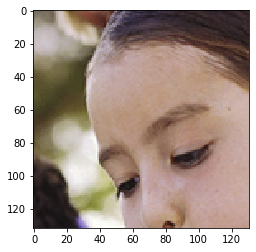

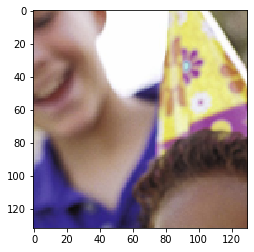

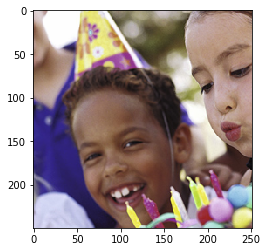

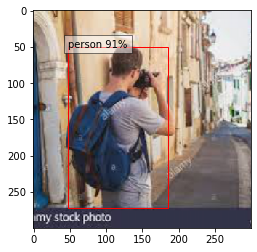

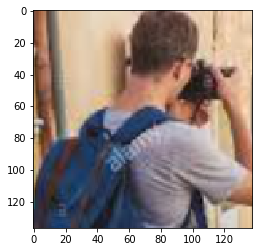

In [9]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))

    #image = inputs[image_idx] / 2 + 0.5
    for idx in range(len(bboxes)):
      if classes_to_labels[classes[idx] - 1] == "person":
        left, bot, right, top = bboxes[idx]
        fig, ax = plt.subplots(1)
        x, y, w, h = [val for val in [left, bot, abs(right - left), abs(top - bot)]]
        # Show original, denormalized image...
        print(int(bot*300), int(top*300), int(left*300),int(right*300))
        im = image[max(0,int(bot*300)): max(0,int((bot+min(w, h))*300)), max(0,int(left*300)): max(0,int((left+min(w, h))*300))]
        ax.imshow(im)
plt.show()

Embedings

In [10]:
import torch
# model = torch.hub.load('pytorch/vision:v0.5.0', 'resnet18', pretrained=True)
# or any of these variants
model = torch.hub.load('pytorch/vision:v0.5.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.5.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.5.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.5.0', 'resnet152', pretrained=True)
model.eval()
for i in model.children():
  print("="*20)
  print(i)

Using cache found in C:\Users\artur/.cache\torch\hub\pytorch_vision_v0.5.0
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2):

In [11]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [33]:
%time
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available() and False:
    input_batch = input_batch.to('cuda')
    model.to('cuda')
else: 
    input_batch = input_batch.to('cpu')
    model.to('cpu')
with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
#print(torch.nn.functional.softmax(output[0], dim=0))


Wall time: 0 ns


In [16]:
x = input_batch
print(x.shape)
layers = list(model.children())
for i in layers[:-1]:
  print("="*20)
  print(i)
  x = i(x)
  print(x.shape)
x = x.view(x.size(0), -1)
emb = x
print(torch.nn.functional.softmax(x))
x = layers[-1](x)
print(x.shape)

torch.Size([1, 3, 224, 224])
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
torch.Size([1, 64, 112, 112])
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([1, 64, 112, 112])
ReLU(inplace=True)
torch.Size([1, 64, 112, 112])
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
torch.Size([1, 64, 56, 56])
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [26]:
last = torch.nn.Linear(512,2)
last.cpu()

Linear(in_features=512, out_features=2, bias=True)

In [27]:
emb = emb.cpu()

In [29]:
%%time
for i in range(100000):
    last(emb)

Wall time: 2.77 s
